<a href="https://colab.research.google.com/github/Yashrajput7232/Data_Science_django/blob/main/bank_loan__approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing  import MinMaxScaler
import warnings
from collections import Counter
from keras import Sequential
from keras.layers import Dense
from sklearn import svm, metrics
# import tensorflow as tf

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Data set/train_u6lujuX_CVtuZ9i (1).csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df=df.dropna()
df.isnull().sum()
df=df.drop('Loan_ID',axis=1)
df['LoanAmount']=(df['LoanAmount']*1000).astype(int)
Counter(df['Loan_Status'])

Counter({'N': 148, 'Y': 332})

In [ ]:
pre_y=df['Loan_Status']
pre_x=df.drop('Loan_Status' ,axis=1)
dm_x=pd.get_dummies(pre_x)
dm_y=pre_y.map(dict(Y=1,N=0))

In [ ]:
dm_x
dm_y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy='minority')
x1,y=smote.fit_resample(dm_x,dm_y)
sc=MinMaxScaler()
x=sc.fit_transform(x1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,shuffle=True)

In [ ]:
# x_train
# y_train
# x_test
# y_test
# print(x_train.shape,y_train.shape)

In [ ]:
cs=Sequential()  #It is a classifier
cs.add(Dense(400,activation='relu',kernel_initializer ='random_normal' , input_dim=x_test.shape[1]))
cs.add(Dense(200,activation='relu',kernel_initializer ='random_normal' ))
cs.add(Dense(4,activation='relu',kernel_initializer ='random_normal' ))
cs.add(Dense(1,activation='sigmoid',kernel_initializer ='random_normal' ))
cs.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# cs.fit(tf.expand_dims(x_train,axis=1),y_train,epochs=50)
cs.fit(x_train,y_train,batch_size=20,epochs=50,verbose=0)
eval_model=cs.evaluate(x_train,y_train)
eval_model

17/17 [==============================] - 0s 3ms/step - loss: 0.2273 - accuracy: 0.9077


[0.2273126095533371, 0.9077212810516357]

In [ ]:
y_pred=cs.predict(x_test)

5/5 [==============================] - 0s 2ms/step


In [ ]:
y_pred=(y_pred>0.52)

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm


array([[54, 14],
       [ 3, 62]])

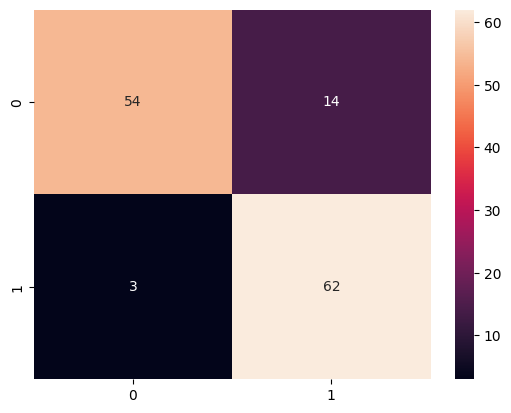

In [26]:
H_map_Cm=sns.heatmap(cm,annot=True)


In [27]:
import pickle
import joblib
# import minmax

filename='loan_Model.pkl'
joblib.dump(cs,filename)

['loan_Model.pkl']

In [28]:
mdl=joblib.load('loan_Model.pkl')
ypred=mdl.predict(x_test)
y_pred=(y_pred>0.55)
y_pred

5/5 [==============================] - 0s 4ms/step


array([[ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [

In [29]:
val=pd.DataFrame(y_pred,columns=['Loan_Status'])
val.replace({True:"approved",False:"not approved"})
val

,Loan_Status
0,True
1,False
2,False
3,False
4,True
...,...
128,False
129,False
130,False
131,True
